## AGE AND GENDER PREDICTION MODEL##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Unzipping the Dataset##

In [ ]:
!unzip /content/drive/MyDrive/UTKFace.zip

Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/52_0_3_20170113190623929.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170117190840617.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119160357804.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119181010188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200211340.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200241996.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200259595.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200407188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204331863.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204337838.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205638160.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205639336.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205641007.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205647136.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205650336.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_201701

##Import Modules##

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

##Load the Dataset##

In [ ]:
BASE_DIR = '/content/UTKFace'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23712 [00:00<?, ?it/s]

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/UTKFace/21_1_1_20170112192955750.jpg....,21,1
1,/content/UTKFace/40_1_3_20170117151929587.jpg....,40,1
2,/content/UTKFace/36_0_0_20170104172716658.jpg....,36,0
3,/content/UTKFace/82_0_0_20170111210217828.jpg....,82,0
4,/content/UTKFace/26_1_3_20170117154109300.jpg....,26,1


##Finding Index of Our Images

In [ ]:
# Finding index of our images
pd.set_option('display.max_rows', None)
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.loc[df['age'] == 20, :]

,image,age,gender
70,/content/UTKFace/20_1_0_20170116212316301.jpg....,20,1
173,/content/UTKFace/20_1_3_20170119144712261.jpg....,20,1
241,/content/UTKFace/20_0_1_20170113132705262.jpg....,20,0
315,/content/UTKFace/20_1_0_20170116205807966.jpg....,20,1
670,/content/UTKFace/20_0_1_20170113180909253.jpg....,20,0
732,/content/UTKFace/20_1_2_20170116170350603.jpg....,20,1
760,/content/UTKFace/20_0_4_20170105161709125.jpg....,20,0
778,/content/UTKFace/20_1_1_20170112230742277.jpg....,20,1
910,/content/UTKFace/20_0_2_20170103234745028.jpg....,20,0
936,/content/UTKFace/20_1_0_20170109212911927.jpg....,20,1


In [ ]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.loc[df['age'] == 22, :]

,image,age,gender
49,/content/UTKFace/22_0_2_20170104021129925.jpg....,22,0
93,/content/UTKFace/22_1_3_20170104222126558.jpg....,22,1
101,/content/UTKFace/22_1_2_20170116172549492.jpg....,22,1
108,/content/UTKFace/22_1_1_20170113010348670.jpg....,22,1
172,/content/UTKFace/22_1_1_20170112230530733.jpg....,22,1
203,/content/UTKFace/22_1_1_20170114025217323.jpg....,22,1
208,/content/UTKFace/22_1_0_20170117141131710.jpg....,22,1
267,/content/UTKFace/22_1_0_20170117143702099.jpg....,22,1
583,/content/UTKFace/22_1_1_20170116162315750.jpg....,22,1
612,/content/UTKFace/22_1_0_20170120133804390.jpg....,22,1


In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

##Exploratory Data Analysis##

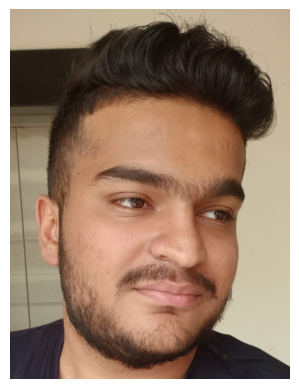

In [ ]:
from PIL import Image
img = Image.open(df['image'][7016])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

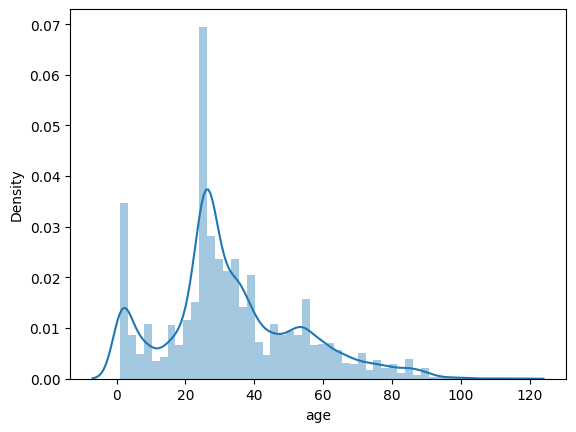

In [ ]:
sns.distplot(df['age'])

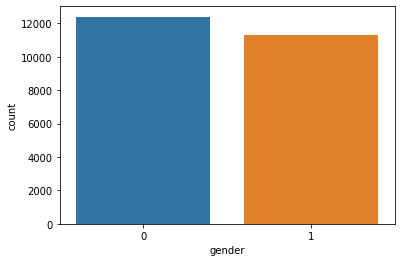

In [ ]:
sns.countplot(df['gender'])

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

##FEATURE EXTRACTION##

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23712 [00:00<?, ?it/s]

In [ ]:
X.shape

(23712, 128, 128, 1)

In [ ]:
X = X/255.0  #normailizing images

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

##CREATING THE MODEL##

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

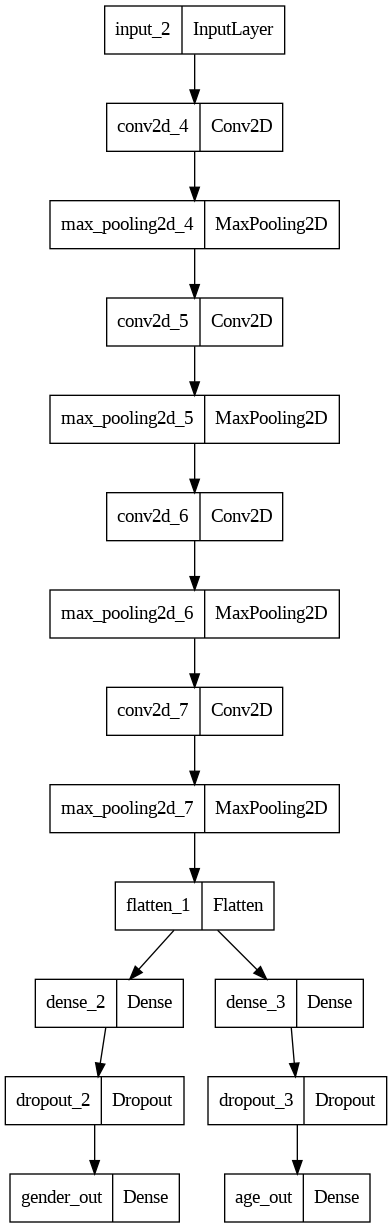

In [ ]:
from tensorflow.keras.utils import plot_model  #plotting the model
plot_model(model)

##TRAINING THE MODEL##

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 16s 22ms/step - loss: 15.6653 - gender_out_loss: 0.6697 - age_out_loss: 14.9956 - gender_out_accuracy: 0.5624 - age_out_accuracy: 0.0467 - val_loss: 12.1341 - val_gender_out_loss: 0.5448 - val_age_out_loss: 11.5893 - val_gender_out_accuracy: 0.7316 - val_age_out_accuracy: 0.0468
Epoch 2/30
593/593 [==============================] - 12s 20ms/step - loss: 11.2647 - gender_out_loss: 0.4794 - age_out_loss: 10.7853 - gender_out_accuracy: 0.7744 - age_out_accuracy: 0.0302 - val_loss: 9.3587 - val_gender_out_loss: 0.4081 - val_age_out_loss: 8.9506 - val_gender_out_accuracy: 0.8079 - val_age_out_accuracy: 0.0150
Epoch 3/30
593/593 [==============================] - 11s 19ms/step - loss: 9.5223 - gender_out_loss: 0.4017 - age_out_loss: 9.1205 - gender_out_accuracy: 0.8188 - age_out_accuracy: 0.0169 - val_loss: 9.5926 - val_gender_out_loss: 0.4115 - val_age_out_loss: 9.1811 - val_gender_out_accuracy: 0.7982 - val_age_out_accuracy: 0.0127
Epoc

##Plotting Results##

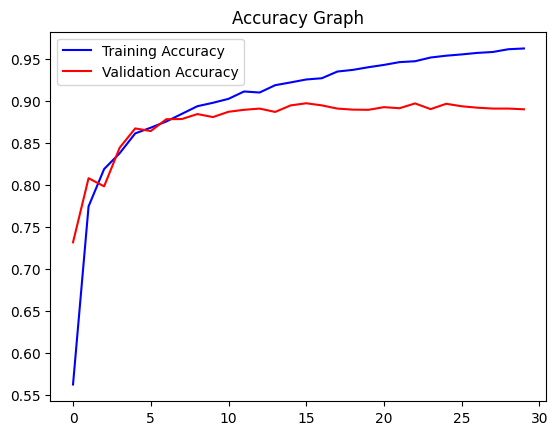

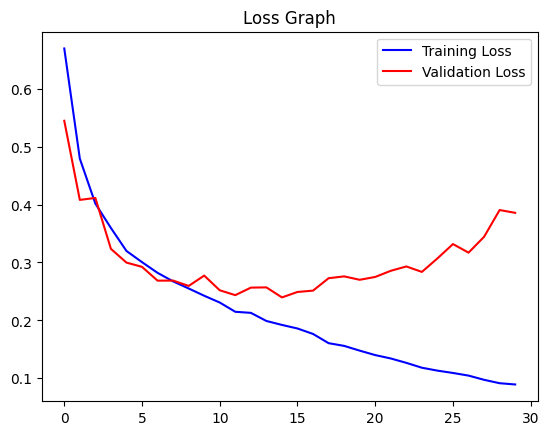

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

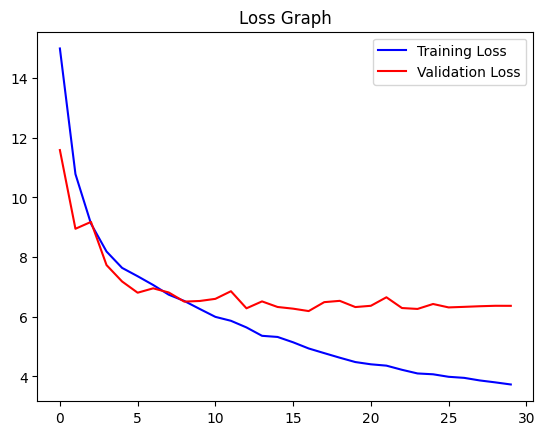

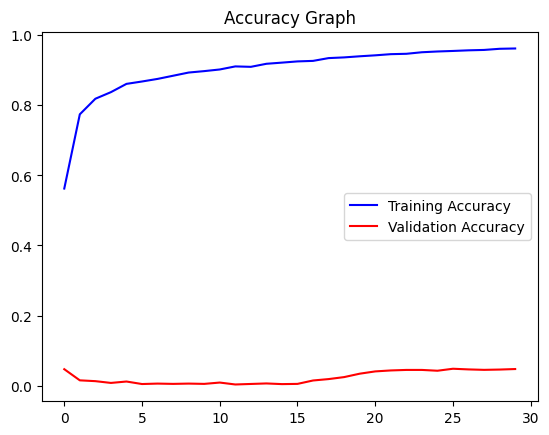

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

accura = history.history['age_out_accuracy']
val_accura = history.history['val_age_out_accuracy']
epochs = range(len(accura))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_accura, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

##Prediction with Test Data##



Original Gender: Male Original Age: 20
1/1 [==============================] - 0s 143ms/step
Predicted Gender: Male Predicted Age: 16


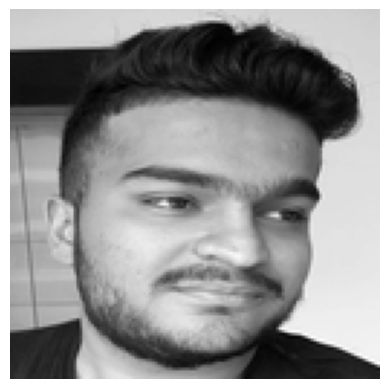

In [ ]:
image_index = 7016
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 20
1/1 [==============================] - 0s 29ms/step
Predicted Gender: Female Predicted Age: 19


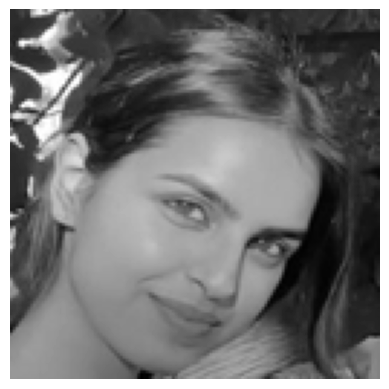

In [ ]:
image_index = 17920
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Male Predicted Age: 19


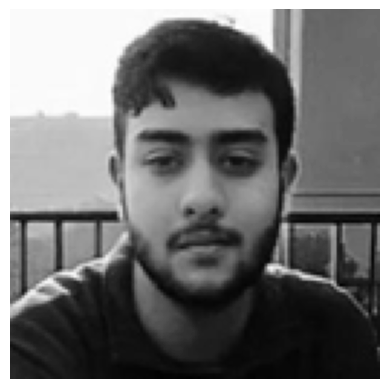

In [ ]:
image_index = 6134
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 22
1/1 [==============================] - 0s 26ms/step
Predicted Gender: Male Predicted Age: 21


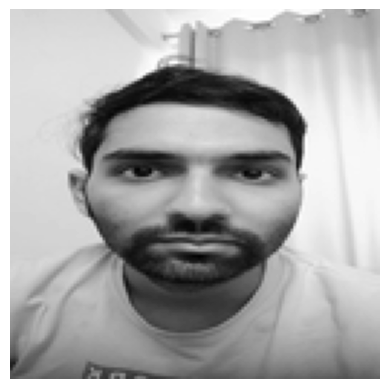

In [ ]:
image_index = 3497
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');